Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [3]:
NAME = "Andrew San"
COLLABORATORS = ""

---

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [24]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# Part 1 : Getting Data (15 pts)

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [ ]:
import utils
from utils import fetch_and_cache
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = fetch_and_cache(data_url,file_name,data_dir,force=False)
print(f'Located at {dest_path}')

### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [ ]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
import os
### START SOLUTION
file_stats=os.stat('data/NYPD_Complaint_Data_Historic.csv')
print(file_stats.st_size)
#print(f'File Size in Bytes is {file_stats.st_size}')
### END_OF SOLUTION

### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [ ]:
# Using utils library, find the number of lines in the file

### START SOLUTION
print(utils.line_count('data/NYPD_Complaint_Data_Historic.csv'))
### END_OF SOLUTION

In [159]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.
import itertools
### START SOLUTION
line_num = utils.line_count('data/NYPD_Complaint_Data_Historic.csv')
print("line number: %d" % (line_num))

# obtain line number range for each sub-dataset
sub_line_num = int(np.ceil(float(line_num) / 10))

# use iterator to write line by line, instead of reading large file to memory
filename = 'data/NYPD_Complaint_Data_Historic.csv'
for i in range(10):
    with open(filename, "r") as f:
        fw = open('data/NYPD_Complaint_Data_Historic%d.csv' % (i+1), "w")
        sliced_f = itertools.islice(f, i*sub_line_num, min((i+1)*sub_line_num, line_num))
        for line in sliced_f:
            fw.write(line)

### END_OF SOLUTION

NameError: name 'utils' is not defined

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [ ]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [ ]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

# Part 2 - Exploratory Data Analysis  (20 points)
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Time to load data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [ ]:
### START SOLUTION
import pandas as pd
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic_USE_THIS.csv")
calls.head()


### END_OF SOLUTION

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,...,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,...,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,...,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,...,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,...,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [ ]:
### START SOLUTION
calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed
#columns  Parks_NM, TRANSIT_DISTRICT , and STATION_NAME should be removed since they are missing alot of data

### END_OF SOLUTION

### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()
calls_by_Boro_and_offense = calls.sort_values('KY_CD').sort_values('BORO_NM')
calls_by_Boro_and_offense

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()
Bronx_offences = calls.loc[calls['BORO_NM']=='BRONX']
np.unique(Bronx_offences['OFNS_DESC'].tolist())



### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
list1 = calls['OFNS_DESC'].value_counts()[0:5]
result = list1.keys()
print(result)
#topFive = list1[0:5]
#topFive

Index(['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
       'CRIMINAL MISCHIEF & RELATED OF', 'GRAND LARCENY'],
      dtype='object')


### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [12]:
### START SOLUTION

arson_probability = calls['OFNS_DESC'].value_counts()['ARSON']/calls['OFNS_DESC'].value_counts().sum()
print(arson_probability)

### END_OF SOLUTION

0.0018198271377981089


---
# Part 3: Visualizing the Data (20 pts)

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

We will continue use EDA for examining a subest of a large data set to see what we can know about the data. Continue to explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

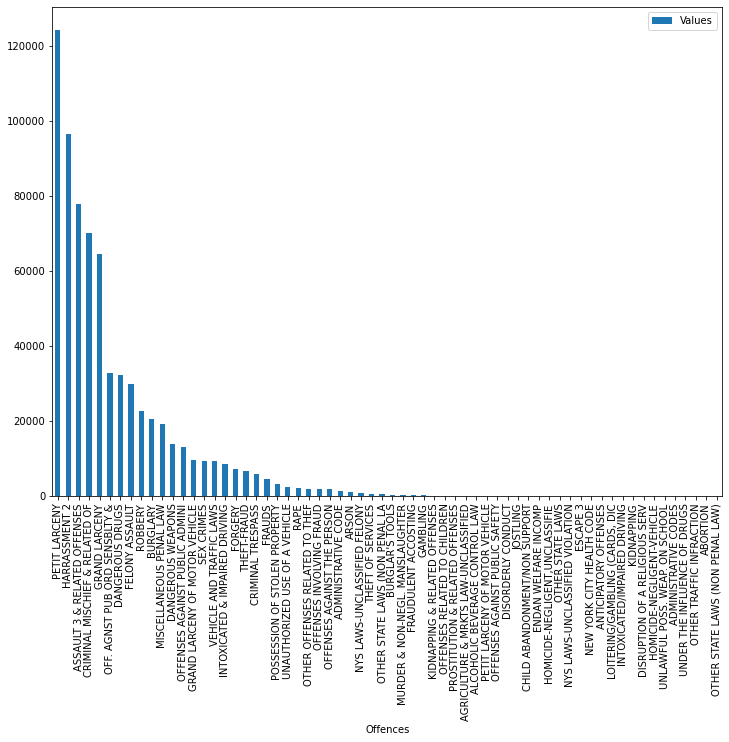

In [13]:
### START SOLUTION
list1 = calls['OFNS_DESC'].value_counts().keys().tolist()
list2 = calls['OFNS_DESC'].value_counts().tolist()
d={'Offences':list1,'Values':list2}
plot_df = pd.DataFrame(d)
#list2 =  (calls['OFNS_DESC'].value_counts().keys())
ax = plot_df.plot.bar(x='Offences', y='Values')
### END_OF SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

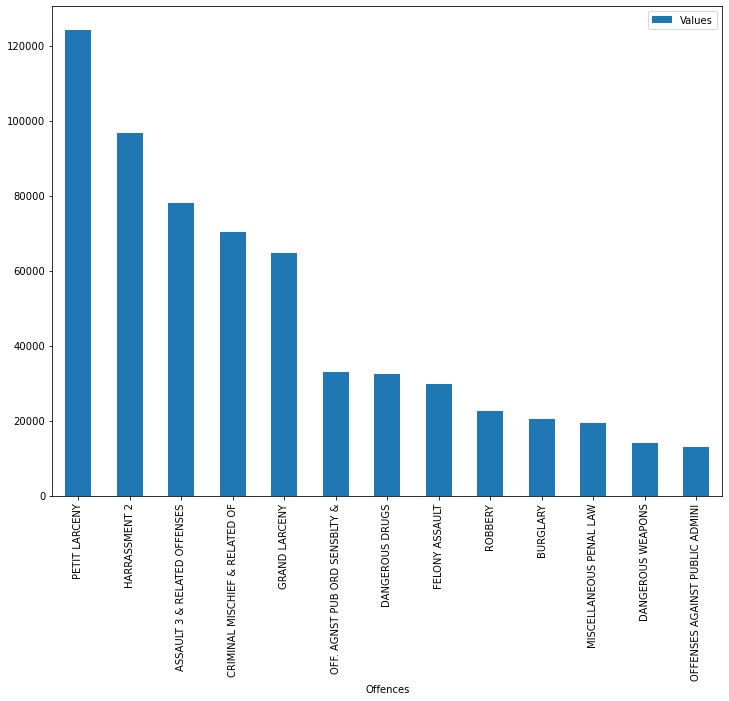

In [21]:
### START SOLUTION
over_1000 = plot_df.loc[(plot_df['Values']>=10000)]
bx = over_1000.plot.bar(x='Offences', y='Values')

### END_OF SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

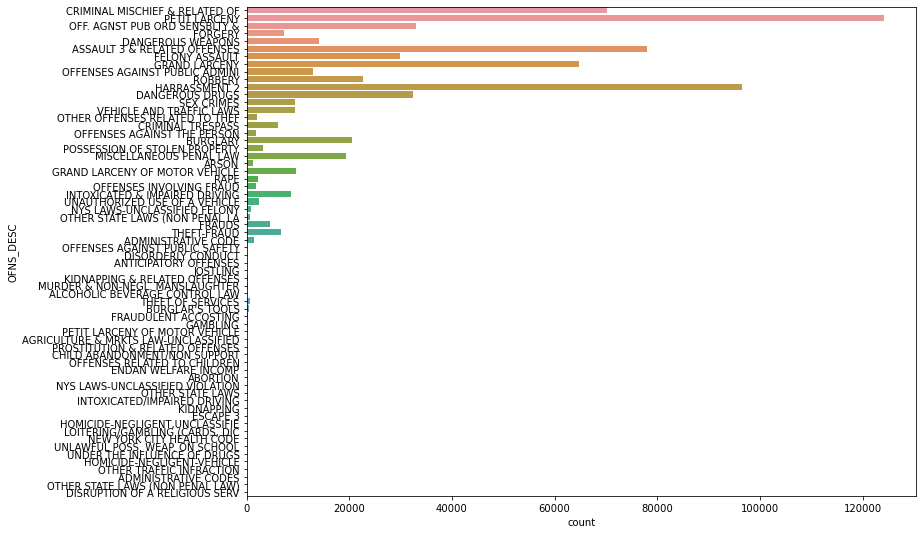

In [29]:
### START SOLUTION
ax = sns.countplot(data=calls, y='OFNS_DESC')
#sns.barplot(x="Number of Calls", y="Crime Category", data=df)
### END_OF SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

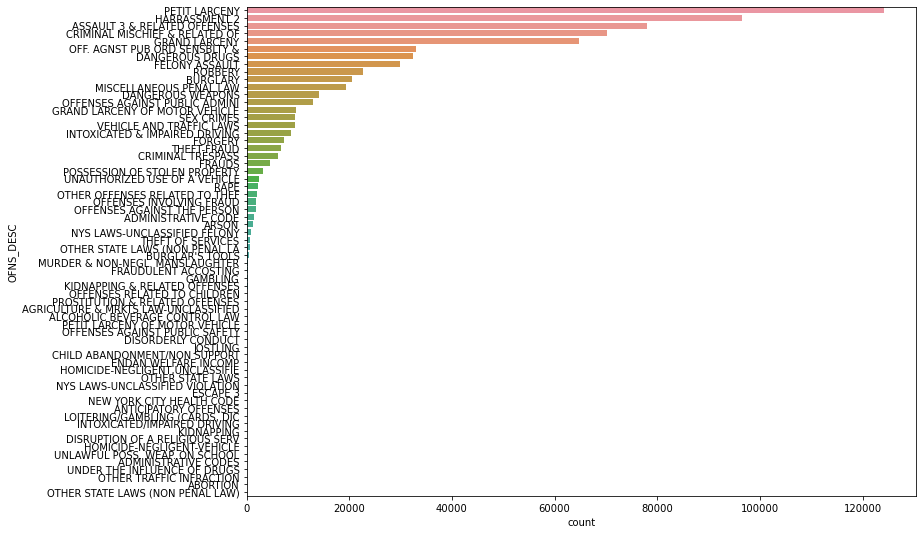

In [30]:
### START SOLUTION
ax = sns.countplot(data=calls, y='OFNS_DESC', order = list1)

### END_OF SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [80]:
# YOUR CODE HERE
#raise NotImplementedError()

import datetime
dates = pd.to_datetime(calls['CMPLNT_FR_DT'], errors = 'coerce', dayfirst = True, format = "%m/%d/%Y")
calls['DAY_OF_WEEK'] = dates.dt.day_name()
calls['DAY_OF_WEEK']
#calls['DAY_OF_WEEK']

0          Thursday
1           Tuesday
2         Wednesday
3          Saturday
4          Saturday
            ...    
702578    Wednesday
702579     Saturday
702580     Thursday
702581       Friday
702582       Monday
Name: DAY_OF_WEEK, Length: 702583, dtype: object

### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

[Text(0, 0, 'Thursday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Saturday'),
 Text(4, 0, 'Monday'),
 Text(5, 0, 'Sunday'),
 Text(6, 0, 'Friday')]

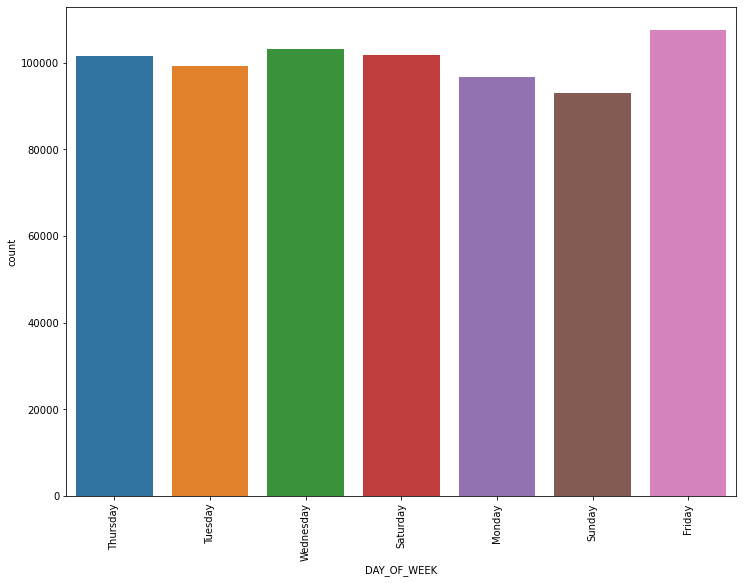

In [95]:
### START SOLUTION
days_plot=sns.countplot(data=calls, x='DAY_OF_WEEK')
days_plot.set_xticklabels(days_plot.get_xticklabels(),rotation = 90)

### END_OF SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

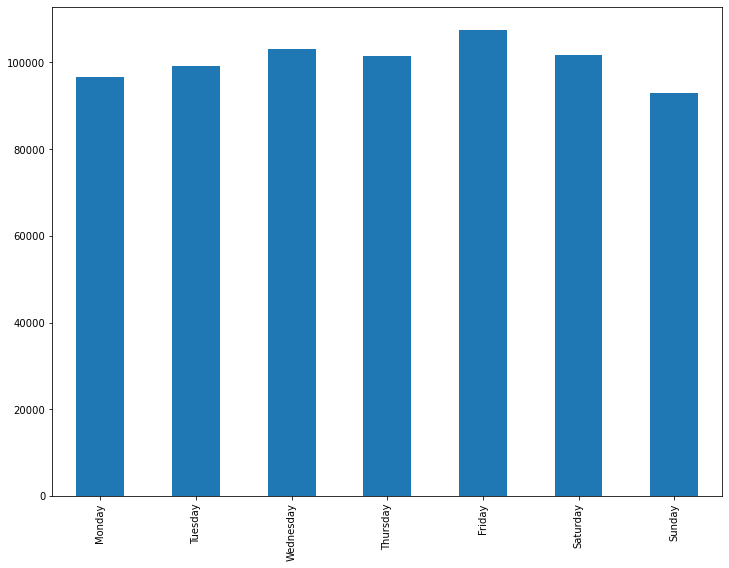

In [96]:
# YOUR CODE HERE
# raise NotImplementedError()
ax = calls['DAY_OF_WEEK'].value_counts()[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(kind='bar')

### 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### START SOLUTION
I believe that Wednesday, Thursday, and Friday are more popular days for calls compared to that of the weekend. The counts for these days are higher, especially Friday which has a sizable difference over Sunday.

##### END_OF SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

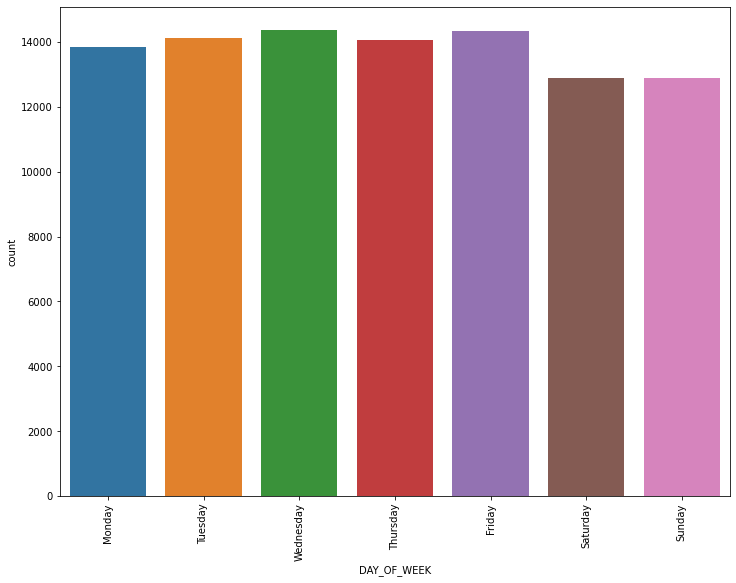

In [103]:
# YOUR CODE HERE
#raise NotImplementedError()
data1 = calls.loc[calls['OFNS_DESC'] == 'HARRASSMENT 2']
#data1
days_plot=sns.countplot(data=data1, x='DAY_OF_WEEK', order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
days_plot.set_xticklabels(days_plot.get_xticklabels(),rotation = 90)


### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

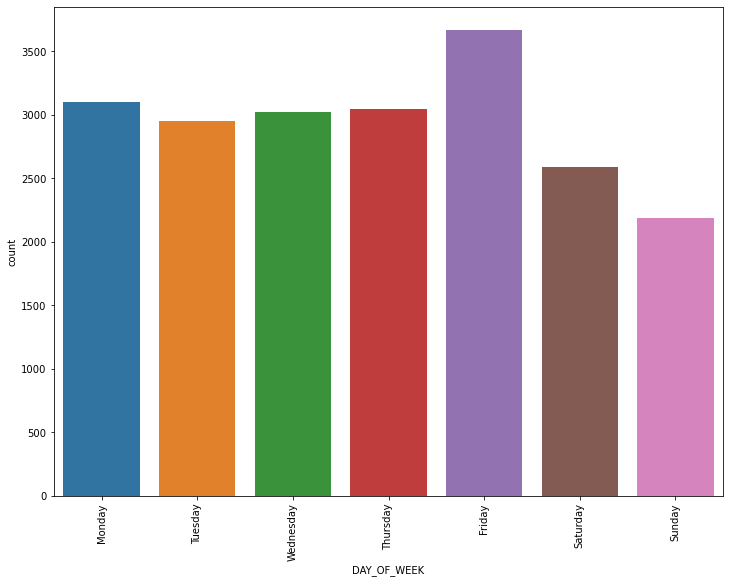

In [104]:
# YOUR CODE HERE
# raise NotImplementedError()
data1 = calls.loc[calls['OFNS_DESC'] == 'BURGLARY']
#data1
days_plot=sns.countplot(data=data1, x='DAY_OF_WEEK', order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
days_plot.set_xticklabels(days_plot.get_xticklabels(),rotation = 90)

### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

In [165]:
# YOUR CODE HERE
#raise NotImplementedError()
times = calls['CMPLNT_TO_TM'].str.slice(stop=2)
calls['Hour'] = times
calls['Hour'] = pd.to_numeric(calls['Hour'], errors='coerce')
calls = calls.dropna(subset=['Hour'])
calls['Hour']
#calls['Hour'].dtypes
#time_plot.set_xticklabels(days_plot.get_xticklabels(),rotation = 90)


2          0.0
3         21.0
4         19.0
7         18.0
8         15.0
          ... 
702577    18.0
702578     6.0
702579     1.0
702581    23.0
702582    15.0
Name: Hour, Length: 579129, dtype: float64

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

Text(0.5, 1.0, 'Number of Calls Reporting Fraud For Each Day of the Week')

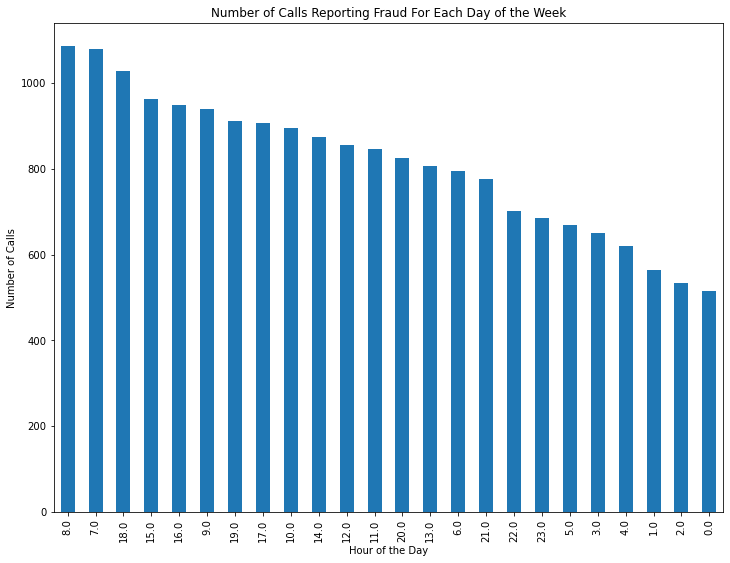

In [172]:
### START SOLUTION
data2 = calls.loc[calls['OFNS_DESC'] == 'BURGLARY']
bx = data2['Hour'].value_counts().plot(kind='bar')
bx.set_xlabel("Hour of the Day")
bx.set_ylabel("Number of Calls")
bx.set_title("Number of Calls Reporting Fraud For Each Day of the Week")
### END_OF SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

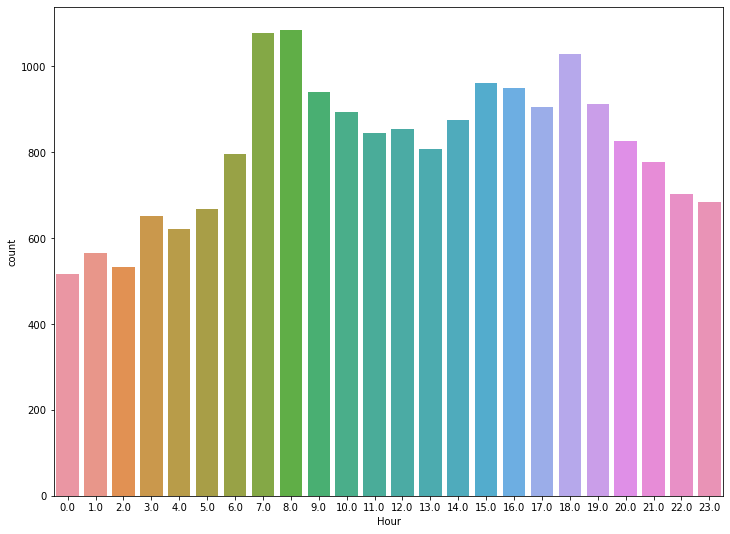

In [175]:
# YOUR CODE HERE
#raise NotImplementedError()
time_plot=sns.countplot(data=data2, x='Hour')


### 3.10 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### START SOLUTION
There are spikes at 7-8 am and 6pm. I believe that this is legitamate, as this is the time where people leave for work and 6 pm where, if people have not come home, they are likely to be robbed

#### END_OF SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

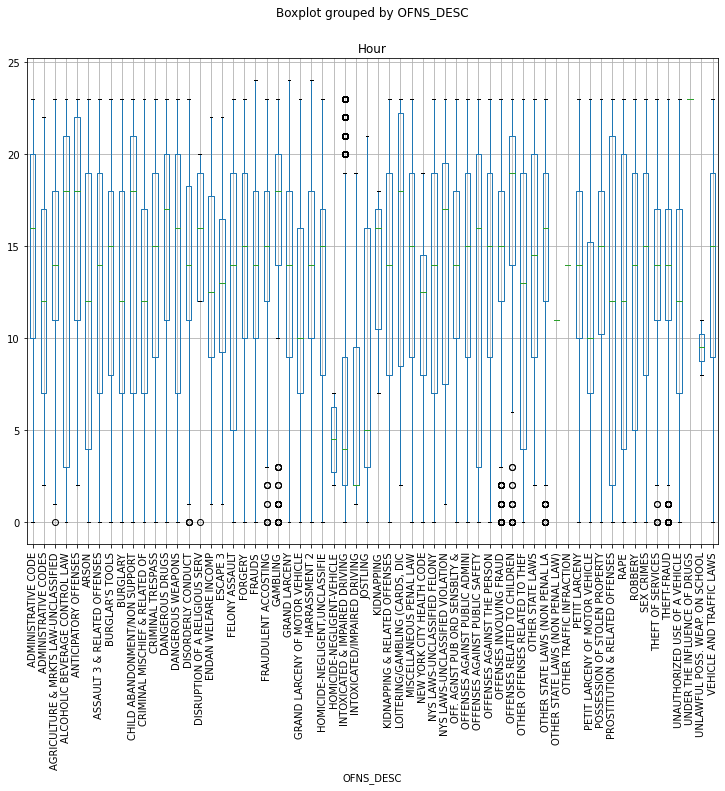

In [174]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()
answer = "Alcholic behaviour seems to have the largest interquartiel range"

### 3.11a Explore Suspect and Victim Age Relationships
In this activity we explore relations between SUSP_AGE_GROUP and VIC_AGE_GROUP
1. create a matrix of where rows are SUSP_AGE_GROUPS and Columns are VIC_AGE_GROUPs
2. Fill in the matrix with all probabilities (eg. "the probability that <18 susp_group target <18 victim_group). 

In [178]:
### START SOLUTION
matrix1 = np.array[len(calls)+1]
### END_OF SOLUTION

TypeError: 'builtin_function_or_method' object is not subscriptable